# Dataset Exploration for Ford GoBike System Data
## by (Ahmed Othman)

## Preliminary Wrangling

> In this part we will explore a dataset for a bike company and try to see what kind of insights we can get out of it. 
First thing though we will import the packages we will be needing during our exploration for this dataset.

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [32]:
bike_df= pd.read_csv("201902-fordgobike-tripdata.csv")

In [33]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [34]:
bike_df.shape

(183412, 16)

In [35]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?
> Our dataset consists of 183412 rows with 16 different feature (or columns). 
The features focues on the duration of a bike trip, in seconds, with time stamps of the start and end of the journey.
The data related to the start station, its names and location and the final station information as well.
It also gives us intel about the bike id.
In addtion, there are some info about the users such as gender, year of birth nd thier membership type.

### Cleaning the dataset first
> We start by taking a look at the data itself making sure it's properly cleaned before taking any step further so we do the following:
#### Dropping Missing Values:

> It's noticed that some stations ids, and names are missing. Also, some members year of birth and gender is missing as well. Since our dataset is fairly large and the missing data is relatively a small portion of our dataset, we can safely elimenate them from our dataset.
#### Making sure to drop duplicates (if any) in our dataset

In [36]:
#dropping all missing values throughout our dataset:
bike_df_v1= bike_df.dropna()

In [37]:
#checking for duplicates:
bike_df_v1.duplicated().sum()


0

In [38]:
bike_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [39]:
bike_df_v1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000



### What is/are the main feature(s) of interest in your dataset?

> From a quick look on the dataset, we can see that **duration_sec**, **user_type**, **member_birth_year**, **member_gender**, and **bike_share_for_all_trip** are some of the interesting features in our dataset.
    The duration could give us insight about how long users to the biking service use the bike in each journey.
    The rest of features gives us info anout who users our features and their membership and age, etc.



## Univariate Exploration

> Let's start visualized each of the previously mentioned features to get a better understanding of our dataset.

In [40]:
bike_df_v1.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

#### Starting with the qualitative varibles:
> We will be looking at the distributaion of all our user base, their gender distribution, and whether they share their trips or not.

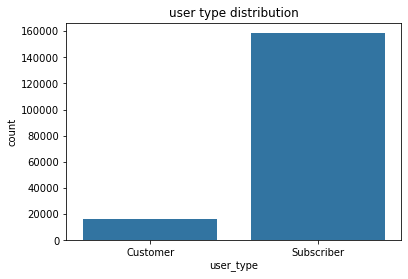

In [41]:
#using the bar chart to plot the user_type
user_type= sb.countplot(data= bike_df_v1, x= 'user_type', color= sb.color_palette()[0]);
user_type.set_title('user type distribution');

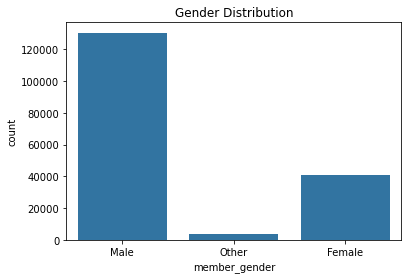

In [42]:
#using the bar chart to plot the member_gender
member_gender= sb.countplot(data= bike_df_v1, x= 'member_gender', color= sb.color_palette()[0]);
member_gender.set_title("Gender Distribution");

In [43]:
trip_sharing_count= bike_df_v1.bike_share_for_all_trip.value_counts()

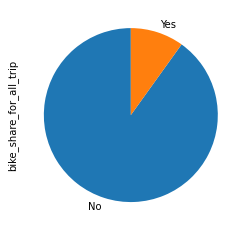

In [44]:
#using the pie plot to represent whether bikes are shared for all trips or not (bike_share_for_all_trip)
bike_df_v1["bike_share_for_all_trip"].value_counts().plot(kind= "pie",labels= trip_sharing_count.index, startangle= 90, 
                                                          counterclock= True);

> From looking at the data above we can clearly see that majority of users for the biking service are subscribers (almost 160K users are subscribers), while less than 20K are just customers.
> By looking at the gender distribution we can clearly see that males represent around 75% of all the users for the service while females are only 23% of the user base. The rest are others.
> Lastly, from the pie chart, we clerly see that most people do not share bikes for all trip.

#### Looking into Quantitative variables:
> we will focus on looking at two variables which are: what are the years in which members were born and the other is the duration they use the biking service.

In [45]:
#Getting the stat about the duration_sec feature:
bike_df_v1.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

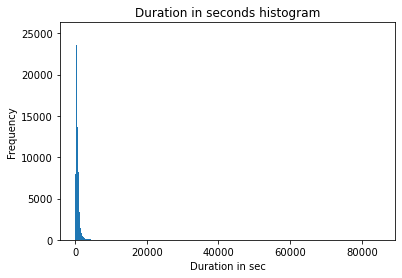

In [46]:
plt.hist(data= bike_df_v1, x= 'duration_sec', bins= ([i for i in range(61, 85000, 100)]));
plt.xlabel('Duration in sec');
plt.ylabel('Frequency');
plt.title('Duration in seconds histogram');

From the statistics, we notice that there's a big variance in our data yet most of it lies below the 800 seconds. Also, if we look at the histogram plot above, it's obvious that it's not indicative enough for our data. In order to make a proper histogram for the duration_sec, we will be using the logarithmic scale.

In [47]:
np.log10(bike_df_v1.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

In [48]:
#Making that bins that we will use to show the hist of the durations:
bins= 10**np.arange(1.8, 5, 0.01)

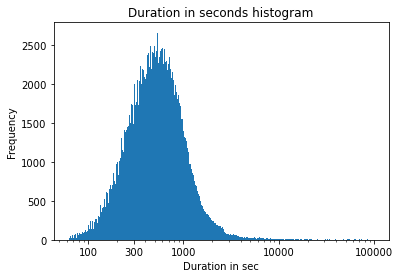

In [49]:
plt.hist(data= bike_df_v1, x= 'duration_sec', bins= bins);
ticks= [100, 300, 1000, 10000, 100000 ]
labels= ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Duration in sec');
plt.ylabel('Frequency');
plt.xticks(ticks, labels);
plt.title('Duration in seconds histogram');

From the histogram above, We notice that our data is normally distributed, and it's indeed confirmed that most of our users use our bikes for durations between 300-1000 seconds.  

In [50]:
bike_df_v1.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [51]:
len(bike_df_v1.query('member_birth_year< 1950'))

674

The summary above shows that our eldest user is 1878 which means he is over 140 years old, which is a bit odd and it looks like an outlier. By making a query to show how many users who are older than 70 years old, we find there is about 675 users which might not make sense that users this old can ride a bike so we will be removing these, also their population is relatively small so it won't affect the final result of our analysis.

In [52]:
bike_df_v2= bike_df_v1.query('member_birth_year> 1950')

In [53]:
bike_df_v2.member_birth_year.describe()

count    174100.000000
mean       1985.017318
std           9.619453
min        1951.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [54]:
bins= np.arange(1951, 2002, 1)

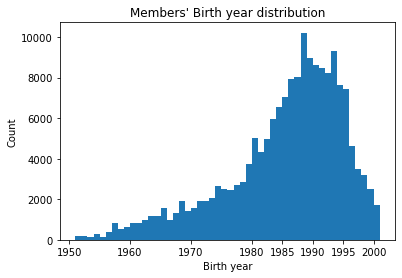

In [55]:
plt.hist(data= bike_df_v2, x= 'member_birth_year', bins= bins);
plt.xlabel('Birth year');
plt.ylabel('Count');
ticks= [1950, 1960, 1970, 1980, 1985, 1990, 1995, 2000]
labels= ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.title("Members' Birth year distribution");

From the diagram above, we can clearly notice that our histogram is skewed to the left, also most of our users we born between 1985 and 1995.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the data. we will try to see how data is distributed based on the user type and thir gender. 
Also, the duration of they use a bike with respect to their birth year.
Let's start by looking at a matrix showing how each variable relates to others.

In [74]:
#df_3= bike_df_v2.copy()
bike_df_v2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [75]:
bike_df_v2["age"]= 2020-bike_df_v2['member_birth_year']
#duration_in_minutes  
bike_df_v2["duration_in_minutes"]= bike_df_v2['duration_sec']/60

<ipython-input-75-d16161945edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_v2["age"]= 2020-bike_df_v2['member_birth_year']
<ipython-input-75-d16161945edd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_v2["duration_in_minutes"]= bike_df_v2['duration_sec']/60


In [57]:
#bike_df_v2.head() #duration_sec, user_type, member_birth_year, member_gender, and bike_share_for_all_trip

In [58]:
#df_3['duration_sec']= df_3['duration_sec'].apply(lambda x: x/60) 

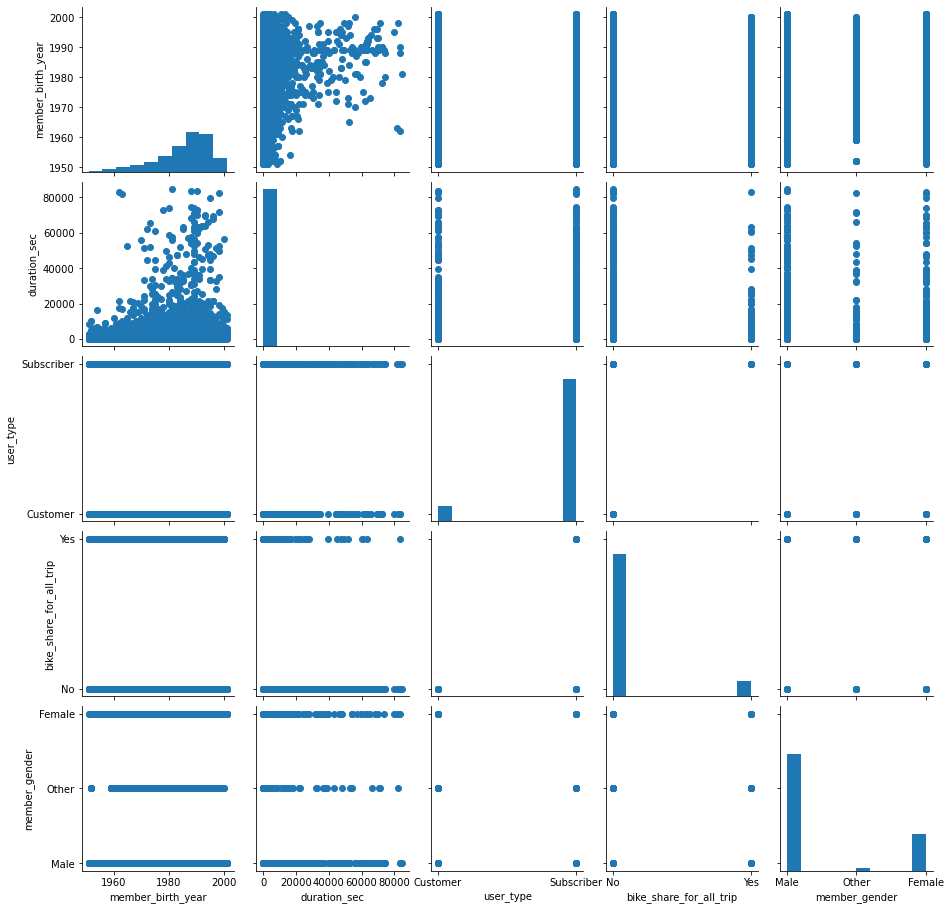

In [59]:
g = sb.PairGrid(data = bike_df_v2, vars = ['member_birth_year', 'duration_sec', 'user_type', 'bike_share_for_all_trip', 'member_gender']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

By looking at the matrix above, it provides us with little to now information, so I will be using different graphs to visualize the data.

In [78]:
sample100= bike_df_v2.sample(100)
sample500= bike_df_v2.sample(500)
sample1000= bike_df_v2.sample(1000)

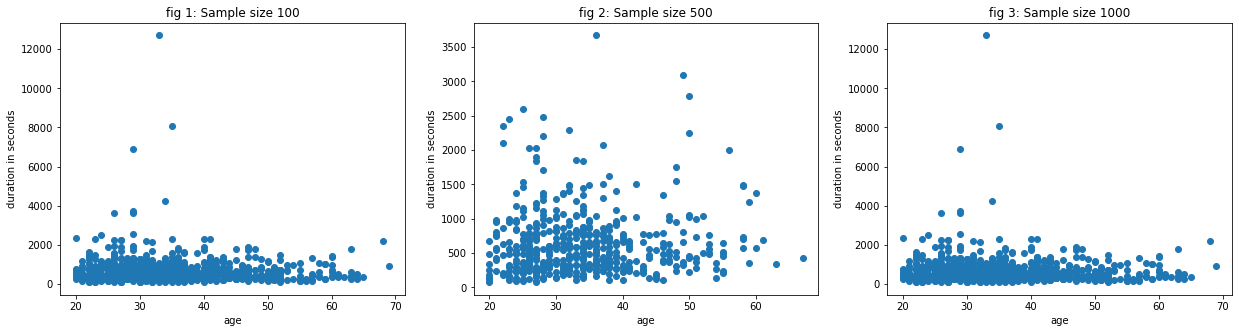

In [85]:
plt.figure(figsize = [21, 5])
plt.subplot(1, 3, 1) 
plt.scatter(data= sample1000, x= 'age', y= 'duration_sec');
plt.title("fig 1: Sample size 100");
plt.xlabel('age');
plt.ylabel('duration in seconds');


plt.subplot(1, 3, 2) 
plt.scatter(data= sample500, x= 'age', y= 'duration_sec');
plt.title("fig 2: Sample size 500");
plt.xlabel('age');
plt.ylabel('duration in seconds');

plt.subplot(1, 3, 3) 
plt.scatter(data= sample1000, x= 'age', y= 'duration_sec');
plt.title("fig 3: Sample size 1000");
plt.xlabel('age');
plt.ylabel('duration in seconds');



In the plot above, I have made scatter plots at different sample sizes to show how the correlation between age and how long do member use bikes. 
in fig 1, it's hard to draw any correlation since the sample size is relatively small, but as the sample size increase (especially in fig 3) we notice that not only most of our users are under 40 but also they did use our bikes for longer when comparted with members who are older.

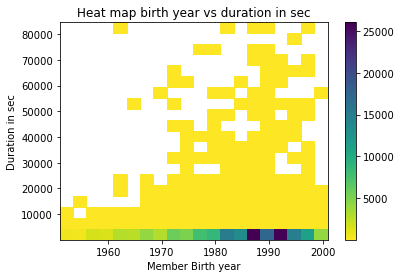

In [86]:
#looking at heat map to indicate how age is reflected in the duration our members use bikes
plt.hist2d(data= bike_df_v2, x= 'member_birth_year', y= 'duration_sec', cmap = 'viridis_r',
          cmin = 0.5, bins= [20, 20]);
plt.colorbar();
plt.xlabel('Member Birth year');
plt.ylabel('Duration in sec');
plt.title("Heat map birth year vs duration in sec");


In [87]:
bike_df_v2.head(0)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_in_minutes


From the heat map shown abobe, we clearly see that most of our users who used the bikes for longer periods of time (i.e. over 15000 s) were born after 1980, While users who were born before that tended to use the bike for less time. Which is less than 10000 s.

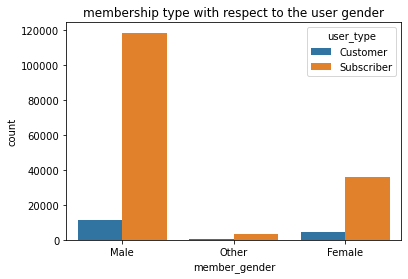

In [88]:
#Bar chart membership type with respect to the user gender
sb.countplot(data= bike_df_v2, x= 'member_gender', hue= 'user_type');
plt.title("membership type with respect to the user gender");

In [89]:
ct_counts = bike_df_v2.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name='count')

In [90]:
ct_counts

,member_gender,user_type,count
0,Female,Customer,4620
1,Female,Subscriber,36080
2,Male,Customer,11468
3,Male,Subscriber,118313
4,Other,Customer,448
5,Other,Subscriber,3171


From the bar chart above and data above, we can see with clarity that the percentage of subscribers in men is higher by around 2 percent in males than females, which is not that significant. but clearly the percentage of males who use our service in general are significanly higher than females. 

## Multivariate Exploration

> Let's take a look on more aggerate plot. Through these plot we will see how more than two variables relate for one another.

In [91]:
bike_df_v2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_in_minutes
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,36.0,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,48.0,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,31.0,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,46.0,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,61.0,29.883333


In the last part, we will make a quick edit where we instead of using age since it's more indicatve of how old our users are and try to relate this with how long they use our service with respect to their gender.
Keep in mind that since we have so many data, we will be taking a sample to make our data more interperateable.

In [92]:
user_sample= bike_df_v2.sample(500)

In [93]:
bike_df_v2.duration_in_minutes.describe()

count    174100.000000
mean         11.738783
std          27.413228
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_in_minutes, dtype: float64

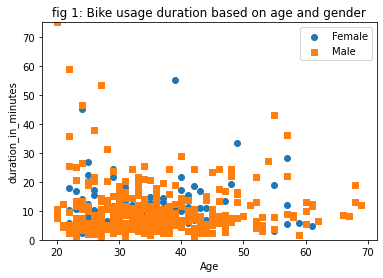

In [94]:
#duration_sec, user_type, member_birth_year, member_gender, and bike_share_for_all_trip
#looking at how the duration a member uses a bike varies based on their age and gender
gender = [['Female', 'o'], ['Male', 's']]

for gender_type, marker in gender:
    df1 = user_sample[user_sample['member_gender'] == gender_type]
    plt.scatter(data= df1, x= 'age', y= 'duration_in_minutes', marker = marker)
plt.legend(['Female','Male']);
plt.ylim(bottom= 0, top= 75);
plt.title('fig 1: Bike usage duration based on age and gender')
plt.xlabel('Age');
plt.ylabel('duration_in_minutes');


In [95]:
bike_df_v2.duration_in_minutes.describe()

count    174100.000000
mean         11.738783
std          27.413228
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_in_minutes, dtype: float64

In [96]:
bins= np.arange(1, 1450, 10)

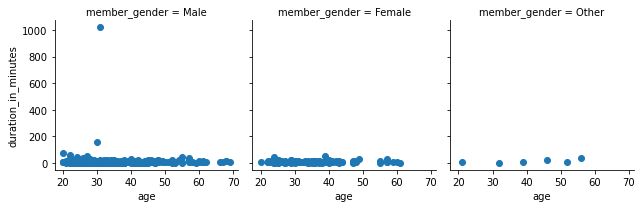

In [97]:
g = sb.FacetGrid(data = user_sample, col = 'member_gender');
g.map(plt.scatter, 'age', 'duration_in_minutes');


In [98]:
bike_df_v2.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

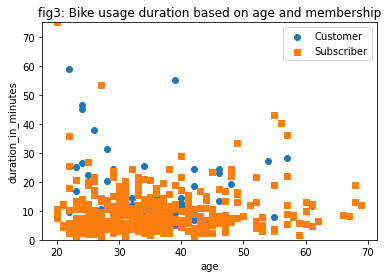

In [99]:
membership = [['Customer', 'o'], ['Subscriber', 's']] #gender
for membership_type, marker in membership:
    df1 = user_sample[user_sample['user_type'] == membership_type]
    plt.scatter(data= df1, x= 'age', y= 'duration_in_minutes', marker = marker)
plt.legend(['Customer','Subscriber']);
plt.ylim(bottom= 0, top= 75);
plt.title('fig3: Bike usage duration based on age and membership');
plt.xlabel('age');
plt.ylabel('duration_in_minutes');


From the first two plots, it's clearly that younger males in their twenties use bikes for the longest, then in mid twenties, we notice that females do actually use bike for longer periods of time.
From lastplot, we clearly can see that most of pople who use our service for extended periods of times we actually subscribers to the service.

### Summary

From our analysis above, we can clearly see the following trends:

- The majority of users for the biking service are subscribers (almost 160K users are subscribers), while less than 20K are just customers. 
- By looking at the gender distribution we can clearly see that males represent 75% of users.
- Most of the users who used the bikes for longer periods of time (i.e. over 15000 s) were born after 1980.
- men tended to subscribe more for the service than women.
- Lastly, younger males in their twenties use bikes for the longest, then in mid twenties.